In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [38]:
from datetime import datetime

# 1.Data Collection

In [39]:
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL' # apple ticker
df = yf.download(ticker,start,end,auto_adjust=False) # we are collecting data from now to past 10 years
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-11-20,26.898451,29.825001,29.980000,29.712500,29.799999,137148400
2015-11-23,26.548965,29.437500,29.932501,29.334999,29.817499,129930000
2015-11-24,26.803743,29.719999,29.837500,29.280001,29.332500,171212800
2015-11-25,26.612095,29.507500,29.807501,29.480000,29.802500,85553200
2015-11-27,26.562492,29.452499,29.602501,29.400000,29.572500,52185600
...,...,...,...,...,...,...
2025-11-14,272.410004,272.410004,275.959991,269.600006,271.049988,47431300
2025-11-17,267.459991,267.459991,270.489990,265.730011,268.820007,45018300


# 2.Data Exploration & Visualization

In [40]:
df.isna().sum()

Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64

In [41]:
df.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,2515.000000,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03
mean,111.564567,113.830145,114.966095,112.581271,113.723106,1.030278e+08
std,71.948995,71.570596,72.267687,70.799122,71.497409,5.829433e+07
min,20.604074,22.584999,22.917500,22.367500,22.500000,2.323470e+07
25%,40.985916,43.577499,43.799999,43.240000,43.551250,6.313855e+07
50%,117.468239,120.589996,121.989998,118.919998,120.360001,8.990850e+07
75%,170.664818,172.834999,174.080002,170.985001,172.445000,1.262672e+08
max,275.250000,275.250000,277.320007,272.089996,276.989990,5.334788e+08


In [42]:
df.dtypes

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object

In [17]:
df.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-11-19,26.781200,29.695000,29.937500,29.190001,29.410000,173183200
2015-11-20,26.898445,29.825001,29.980000,29.712500,29.799999,137148400
2015-11-23,26.548967,29.437500,29.932501,29.334999,29.817499,129930000
2015-11-24,26.803751,29.719999,29.837500,29.280001,29.332500,171212800
2015-11-25,26.612093,29.507500,29.807501,29.480000,29.802500,85553200


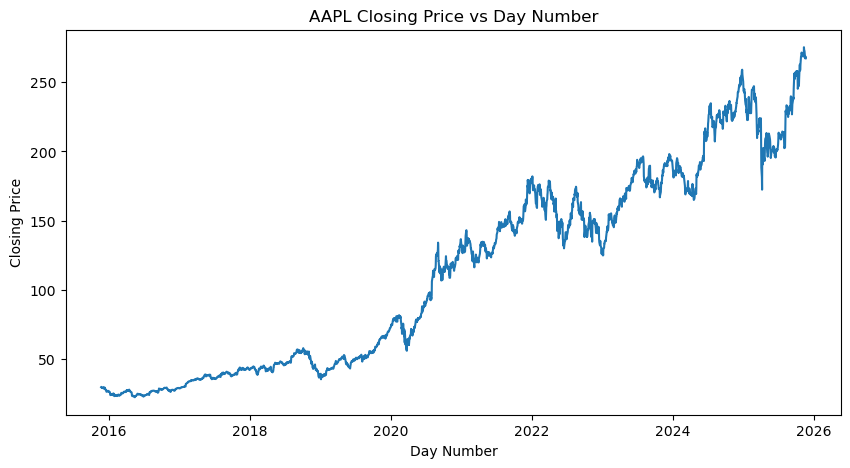

In [43]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.title("AAPL Closing Price vs Day Number")
plt.show()

# 3.Feature Engineering

In [24]:
# MA-->moving average gives the avergare form this to prev ndays average ..if we calculating for n days

In [5]:
df1 = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [6]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


#### 100 Days MA

In [44]:
df['MA_100'] = df['Close'].rolling(window=100).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,MA_100
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,,
2015-11-20,26.898451,29.825001,29.980000,29.712500,29.799999,137148400,NaN
2015-11-23,26.548965,29.437500,29.932501,29.334999,29.817499,129930000,NaN
2015-11-24,26.803743,29.719999,29.837500,29.280001,29.332500,171212800,NaN
2015-11-25,26.612095,29.507500,29.807501,29.480000,29.802500,85553200,NaN
2015-11-27,26.562492,29.452499,29.602501,29.400000,29.572500,52185600,NaN
...,...,...,...,...,...,...,...
2025-11-14,272.410004,272.410004,275.959991,269.600006,271.049988,47431300,237.170000
2025-11-17,267.459991,267.459991,270.489990,265.730011,268.820007,45018300,237.834600


Text(0.5, 1.0, 'AAPL Closing Price vs Day Number Moving Average')

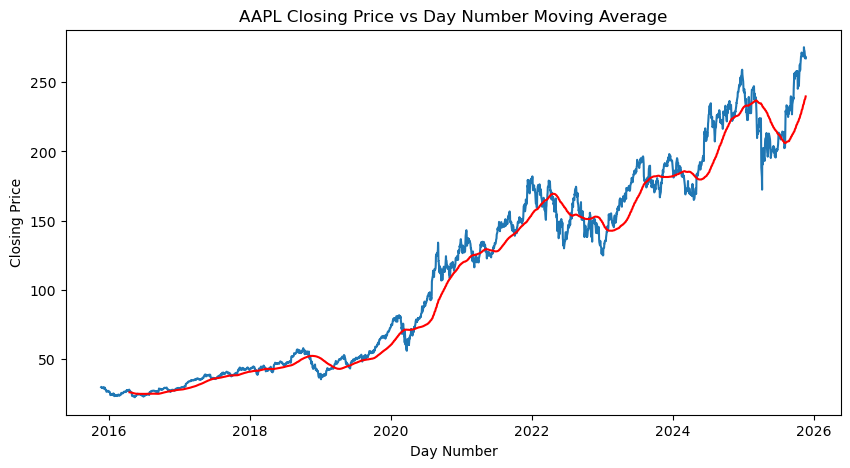

In [45]:
plt.figure(figsize=(10,5))
plt.plot(df['Close'])
plt.plot(df['MA_100'],'r')
plt.xlabel("Day Number")
plt.ylabel("Closing Price")
plt.title("AAPL Closing Price vs Day Number Moving Average")


#### 200 Days MA

In [46]:
df['200_MA'] = df['Close'].rolling(window=200).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,MA_100,200_MA
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2015-11-20,26.898451,29.825001,29.980000,29.712500,29.799999,137148400,NaN,NaN
2015-11-23,26.548965,29.437500,29.932501,29.334999,29.817499,129930000,NaN,NaN
2015-11-24,26.803743,29.719999,29.837500,29.280001,29.332500,171212800,NaN,NaN
2015-11-25,26.612095,29.507500,29.807501,29.480000,29.802500,85553200,NaN,NaN
2015-11-27,26.562492,29.452499,29.602501,29.400000,29.572500,52185600,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-11-14,272.410004,272.410004,275.959991,269.600006,271.049988,47431300,237.170000,225.37580
2025-11-17,267.459991,267.459991,270.489990,265.730011,268.820007,45018300,237.834600,225.53310


Text(0.5, 1.0, 'AAPL Closing Price vs Day Number Moving Average')

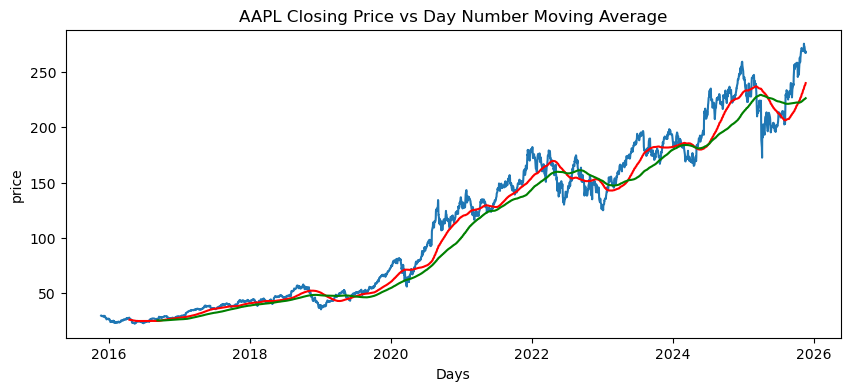

In [47]:
plt.figure(figsize=(10,4))
plt.plot(df['Close'])
plt.plot(df['MA_100'],'r')
plt.plot(df['200_MA'],'g')
plt.xlabel("Days")
plt.ylabel("price")
plt.title("AAPL Closing Price vs Day Number Moving Average")

### Calculating % changes in each trading session

In [48]:
df['percentage_change'] = df.Close.pct_change()
df[['Close','percentage_change']]

Price,Close,percentage_change
Ticker,AAPL,
Date,,
2015-11-20,29.825001,NaN
2015-11-23,29.437500,-0.012992
2015-11-24,29.719999,0.009597
2015-11-25,29.507500,-0.007150
2015-11-27,29.452499,-0.001864
...,...,...
2025-11-14,272.410004,-0.001978
2025-11-17,267.459991,-0.018171


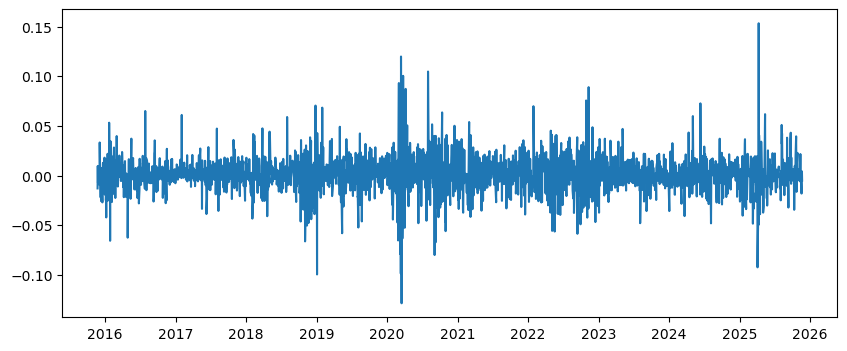

In [49]:
plt.figure(figsize=(10,4))
plt.plot(df.percentage_change)

# 4.Data Preprocessing

In [50]:
# in this we will spit data in 2 parts testing data ,traning data
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])
print(data_testing)

Ticker            AAPL
Date                  
2022-11-17  150.720001
2022-11-18  151.289993
2022-11-21  148.009995
2022-11-22  150.179993
2022-11-23  151.070007
...                ...
2025-11-14  272.410004
2025-11-17  267.459991
2025-11-18  267.440002
2025-11-19  268.559998
2025-11-20  267.209991

[755 rows x 1 columns]


In [51]:
# Scaling the data between 0 to 1.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [52]:
data_training_array = scaler.fit_transform(data_training)
len(data_training_array)

1760

 # 5. Sequence Creation

In [53]:
x_train=[]
y_train=[]

for i in range(100,len(data_training_array)):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [54]:
x_train.ndim

3

In [55]:
y_train.ndim

1

# 6.Model Building

In [56]:
import tensorflow as tf


In [57]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [58]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=(128), activation='tanh', return_sequences=True))
model.add(LSTM(units=(64)))
model.add(Dense(25))
model.add(Dense(1))

# 7.Model Training

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0121
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 6.6152e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - loss: 5.8535e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - loss: 5.8637e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 172ms/step - loss: 6.2593e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 193ms/step - loss: 5.4679e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - loss: 5.1039e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 4.6798e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 4.7011e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 144ms/step - loss: 4.6147e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step - loss: 4.4141e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 161ms/step - loss: 4.3194e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 158ms/step - loss: 4.3154e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 8s 157ms/step - loss: 3.7457e-04
Epoc

In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [61]:
model.save('stock_prediction_model.keras')

# 8.Prepare test data

In [62]:
past_100_days_data = data_training.tail(100)
past_100_days_data

Ticker,AAPL
Date,
2022-06-28,137.440002
2022-06-29,139.229996
2022-06-30,136.720001
2022-07-01,138.929993
2022-07-05,141.559998
...,...
2022-11-10,146.869995
2022-11-11,149.699997
2022-11-14,148.279999


In [63]:
final_df = pd.concat([past_100_days_data, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,137.440002
1,139.229996
2,136.720001
3,138.929993
4,141.559998
...,...
850,272.410004
851,267.459991
852,267.440002
853,268.559998


In [64]:
input_data = scaler.fit_transform(final_df)
input_data

array([[8.26732711e-02],
       [9.45882897e-02],
       [7.78806118e-02],
       [9.25913314e-02],
       [1.10097854e-01],
       [1.19150643e-01],
       [1.41982354e-01],
       [1.46575226e-01],
       [1.32130720e-01],
       [1.38720652e-01],
       [1.36257794e-01],
       [1.56094016e-01],
       [1.67409978e-01],
       [1.46775013e-01],
       [1.72934852e-01],
       [1.86513985e-01],
       [2.01890493e-01],
       [1.93503289e-01],
       [1.85914928e-01],
       [1.76928768e-01],
       [2.11475710e-01],
       [2.15203413e-01],
       [2.49550669e-01],
       [2.42894209e-01],
       [2.32909519e-01],
       [2.73647123e-01],
       [2.71517007e-01],
       [2.68455093e-01],
       [2.65259919e-01],
       [2.65592762e-01],
       [2.94348718e-01],
       [2.89356373e-01],
       [3.13386197e-01],
       [3.20641714e-01],
       [3.19576656e-01],
       [3.29694504e-01],
       [3.27031859e-01],
       [3.09525438e-01],
       [2.83232442e-01],
       [2.80969168e-01],


In [65]:
x_test = []
y_test = []

for i in range(100, len(input_data)):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])


In [66]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [27]:
x_test

array([[[0.08267327],
        [0.09458829],
        [0.07788061],
        ...,
        [0.15482927],
        [0.16654461],
        [0.15822403]],

       [[0.09458829],
        [0.07788061],
        [0.09259133],
        ...,
        [0.16654461],
        [0.15822403],
        [0.17107105]],

       [[0.07788061],
        [0.09259133],
        [0.11009785],
        ...,
        [0.15822403],
        [0.17107105],
        [0.17486518]],

       ...,

       [[0.50629038],
        [0.53351527],
        [0.55115495],
        ...,
        [0.98469022],
        [0.98109568],
        [0.94814612]],

       [[0.53351527],
        [0.55115495],
        [0.58190777],
        ...,
        [0.98109568],
        [0.94814612],
        [0.94801306]],

       [[0.55115495],
        [0.58190777],
        [0.58929644],
        ...,
        [0.94814612],
        [0.94801306],
        [0.95546827]]], shape=(755, 100, 1))

In [28]:
y_test

array([1.71071051e-01, 1.74865180e-01, 1.53032000e-01, 1.67476506e-01,
       1.73400853e-01, 1.53697687e-01, 1.27804061e-01, 1.07501838e-01,
       1.53165158e-01, 1.55028958e-01, 1.51700728e-01, 1.43846154e-01,
       1.19084115e-01, 1.05970881e-01, 1.17353371e-01, 1.14091770e-01,
       1.29601334e-01, 1.36124636e-01, 1.21081073e-01, 7.64161825e-02,
       6.31697907e-02, 4.89249704e-02, 4.84590711e-02, 6.94268793e-02,
       4.79930701e-02, 4.55302124e-02, 3.33488785e-02, 6.78961758e-03,
       3.05531776e-02, 3.26831919e-02, 3.32843311e-04, 8.91968274e-03,
       0.00000000e+00, 3.06197056e-02, 3.41476212e-02, 3.80083802e-02,
       5.63802747e-02, 5.58477457e-02, 6.48339057e-02, 7.26885812e-02,
       6.78293939e-02, 6.82287652e-02, 8.55355001e-02, 1.07102467e-01,
       1.16554628e-01, 1.12094812e-01, 1.26073418e-01, 1.39186551e-01,
       1.19683172e-01, 1.28269961e-01, 1.35858321e-01, 1.71736738e-01,
       1.96232462e-01, 1.77794039e-01, 1.97230890e-01, 1.79058783e-01,
      

# 9.Making Predictions

In [67]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


In [68]:
y_predicted

array([[0.16140242],
       [0.1634575 ],
       [0.16612679],
       [0.1582084 ],
       [0.1572573 ],
       [0.16103521],
       [0.15628181],
       [0.14101692],
       [0.12182292],
       [0.12809557],
       [0.13933142],
       [0.14634904],
       [0.14622241],
       [0.13401806],
       [0.11849227],
       [0.11283157],
       [0.11063349],
       [0.11646868],
       [0.12487035],
       [0.1246364 ],
       [0.10463794],
       [0.08283744],
       [0.06394118],
       [0.05286994],
       [0.05540373],
       [0.05354191],
       [0.05045054],
       [0.04395036],
       [0.02983149],
       [0.02633684],
       [0.02773621],
       [0.01941167],
       [0.01390562],
       [0.00818516],
       [0.01408894],
       [0.0228227 ],
       [0.03077452],
       [0.04198904],
       [0.04998785],
       [0.05716597],
       [0.06412617],
       [0.06650718],
       [0.06669319],
       [0.07241834],
       [0.08560294],
       [0.0996322 ],
       [0.10675921],
       [0.114

In [69]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


In [70]:
y_test

array([150.72000122, 151.28999329, 148.00999451, 150.17999268,
       151.07000732, 148.11000061, 144.22000122, 141.16999817,
       148.02999878, 148.30999756, 147.80999756, 146.63000488,
       142.91000366, 140.94000244, 142.6499939 , 142.16000366,
       144.49000549, 145.47000122, 143.21000671, 136.5       ,
       134.50999451, 132.36999512, 132.30000305, 135.44999695,
       132.22999573, 131.86000061, 130.02999878, 126.04000092,
       129.61000061, 129.92999268, 125.06999969, 126.36000061,
       125.01999664, 129.61999512, 130.1499939 , 130.72999573,
       133.49000549, 133.41000366, 134.75999451, 135.94000244,
       135.21000671, 135.27000427, 137.86999512, 141.11000061,
       142.52999878, 141.86000061, 143.96000671, 145.92999268,
       143.        , 144.28999329, 145.42999268, 150.82000732,
       154.5       , 151.72999573, 154.6499939 , 151.91999817,
       150.86999512, 151.00999451, 153.8500061 , 153.19999695,
       155.33000183, 153.71000671, 152.55000305, 148.47

In [71]:
y_predicted

array([149.26749, 149.57622, 149.97722, 148.78764, 148.64476, 149.21231,
       148.49821, 146.20497, 143.32146, 144.2638 , 145.95175, 147.00601,
       146.98698, 145.15353, 142.82109, 141.97069, 141.64046, 142.51709,
       143.77927, 143.74413, 140.73976, 137.46466, 134.62587, 132.96265,
       133.3433 , 133.0636 , 132.59918, 131.62267, 129.50159, 128.97658,
       129.18681, 127.93621, 127.10904, 126.24966, 127.13658, 128.44865,
       129.64325, 131.32802, 132.52966, 133.60803, 134.65367, 135.01137,
       135.03932, 135.89941, 137.88013, 139.98773, 141.05844, 142.23123,
       143.7265 , 143.5017 , 143.42058, 143.85165, 146.453  , 150.15585,
       151.4117 , 152.73962, 152.23528, 151.00743, 150.18733, 151.06645,
       151.73834, 153.05574, 153.26024, 152.60197, 150.25174, 148.73305,
       148.28307, 147.19643, 146.96642, 146.8579 , 145.98427, 145.541  ,
       147.49557, 150.4681 , 151.49585, 152.09637, 151.26259, 149.498  ,
       149.09694, 150.11464, 151.2664 , 153.25165, 

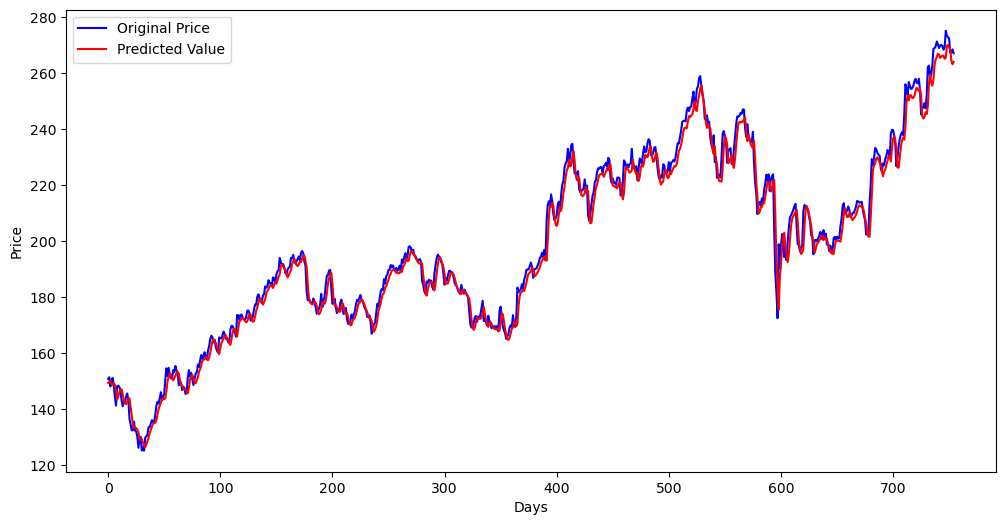

In [73]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Value')
plt.xlabel("Days")
plt.ylabel('Price')
plt.legend()

(160.0, 280.0)

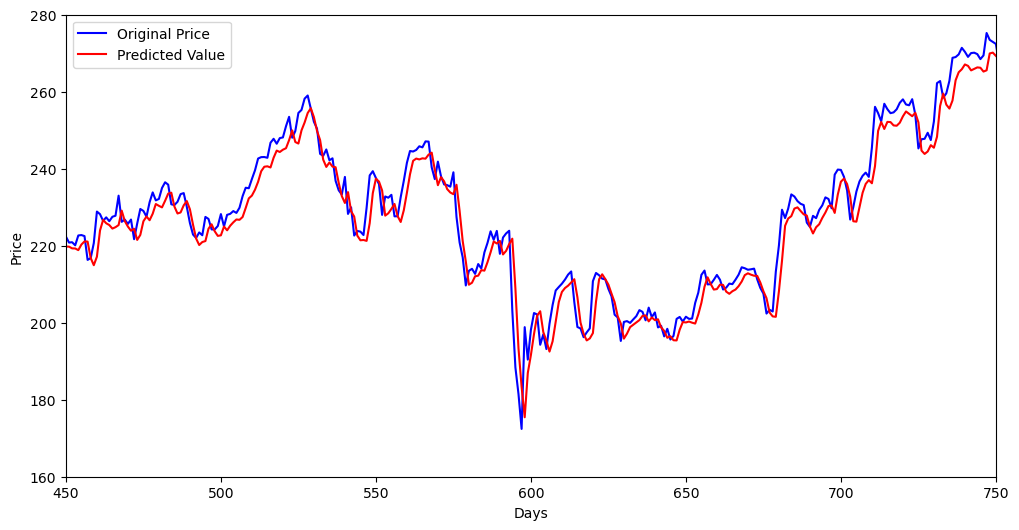

In [74]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Value')
plt.xlabel("Days")
plt.ylabel('Price')
plt.legend()
plt.xlim(450,750)
plt.ylim(160,280)

# 10. Model Evaluation

In [78]:
# MSE(mean squared error)
from sklearn.metrics import mean_squared_error,  r2_score

In [76]:
mse = mean_squared_error(y_test, y_predicted)
print("Mean suared error(MSE):",mse)

Mean suared error(MSE): 16.090435982103667


In [77]:
# root mean suared error(RMSE)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

RMSE : 4.0112885687897935


In [79]:
# R-squared
r2 = r2_score(y_test, y_predicted)
print("r2:",r2)

r2: 0.9852194463618613
